Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
First 5 rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4           

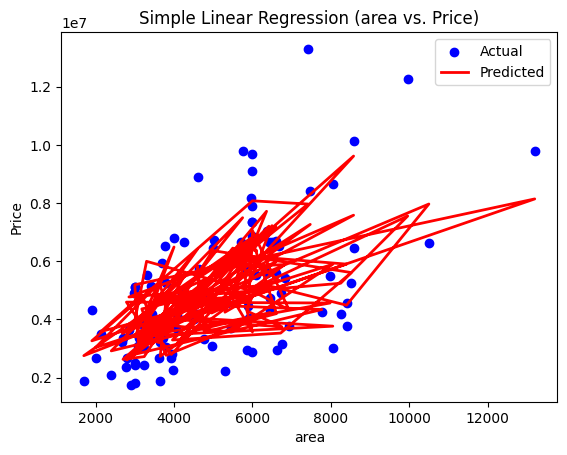

In [3]:
# ============================================
# Linear Regression - Task 3 (Google Colab)
# Load dataset directly from Google Drive
# ============================================

# ---- STEP 1: Mount Google Drive ----
from google.colab import drive
drive.mount('/content/drive')

# ---- STEP 2: Set dataset path from Drive ----
# Replace the path below with the *full path* you copied from Google Drive
# Example: "/content/drive/MyDrive/datasets/Housing.csv"
dataset_path = "/content/drive/MyDrive/DDataset/Housing.csv"

# ---- STEP 3: Import libraries ----
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# ---- STEP 4: Load and inspect data ----
df = pd.read_csv(dataset_path)
print("First 5 rows of the dataset:")
print(df.head())

# Optional: Convert categorical features to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# ---- STEP 5: Define features (X) and target (y) ----
# Example: Predicting 'price' based on other features
X = df.drop('price', axis=1)
y = df['price']

# ---- STEP 6: Split into train/test sets ----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ---- STEP 7: Train Linear Regression model ----
model = LinearRegression()
model.fit(X_train, y_train)

# ---- STEP 8: Predictions ----
y_pred = model.predict(X_test)

# ---- STEP 9: Evaluation Metrics ----
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R² Score: {r2:.4f}")

# ---- STEP 10: Coefficients & Interpretation ----
coeff_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nModel Coefficients:")
print(coeff_df)

# ---- STEP 11: Simple Regression Plot (Example: price vs. area) ----
# Change 'area' to the numeric feature you want to plot
feature_name = 'area'
plt.scatter(X_test[feature_name], y_test, color='blue', label='Actual')
plt.plot(X_test[feature_name], model.predict(X_test), color='red', linewidth=2, label='Predicted')
plt.xlabel(feature_name)
plt.ylabel('Price')
plt.title(f'Simple Linear Regression ({feature_name} vs. Price)')
plt.legend()
plt.show()
